# Week 1 challange

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk
from collections import Counter
import re
from datetime import datetime

In [10]:
# Download NLTK stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\doff
[nltk_data]     n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Descriptive Statistic

In [21]:
data = pd.read_csv(r"C:\Users\doff n\Desktop\doffneri\week1\src\raw_analyst_ratings.csv")

In [17]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [18]:
print(data.columns)
print(data.describe())

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06


## Identify which columns have NaN values

In [25]:
nan_columns = data.isnull().any()
print(nan_columns)

Unnamed: 0    False
headline      False
url           False
publisher     False
date          False
stock         False
dtype: bool


## Length of Each Textual Entry

In [26]:
data['headline_length'] = data['headline'].apply(len)
headline_stats = data['headline_length'].describe()

print("Headline Length Statistics:")
print(headline_stats)


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


## Articles per publisher

In [27]:
publisher_counts = data['publisher'].value_counts()

print("\nTop 10 Publishers by Number of Articles:")
print(publisher_counts.head(10))



Top 10 Publishers by Number of Articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


## Publication date trends

In [29]:
def convert_to_datetime(date_string):
    try:
        return datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
    except ValueError:
        # Handle or log errors as needed
        return None


In [30]:
data['date'] = data['date'].apply(convert_to_datetime)


## Visualization


Publication Date Trends (first 10 dates):
date
2009-02-14    1
2009-04-27    2
2009-04-29    1
2009-05-22    1
2009-05-27    6
2009-05-29    2
2009-05-30    3
2009-06-01    5
2009-06-02    2
2009-06-05    6
Name: count, dtype: int64


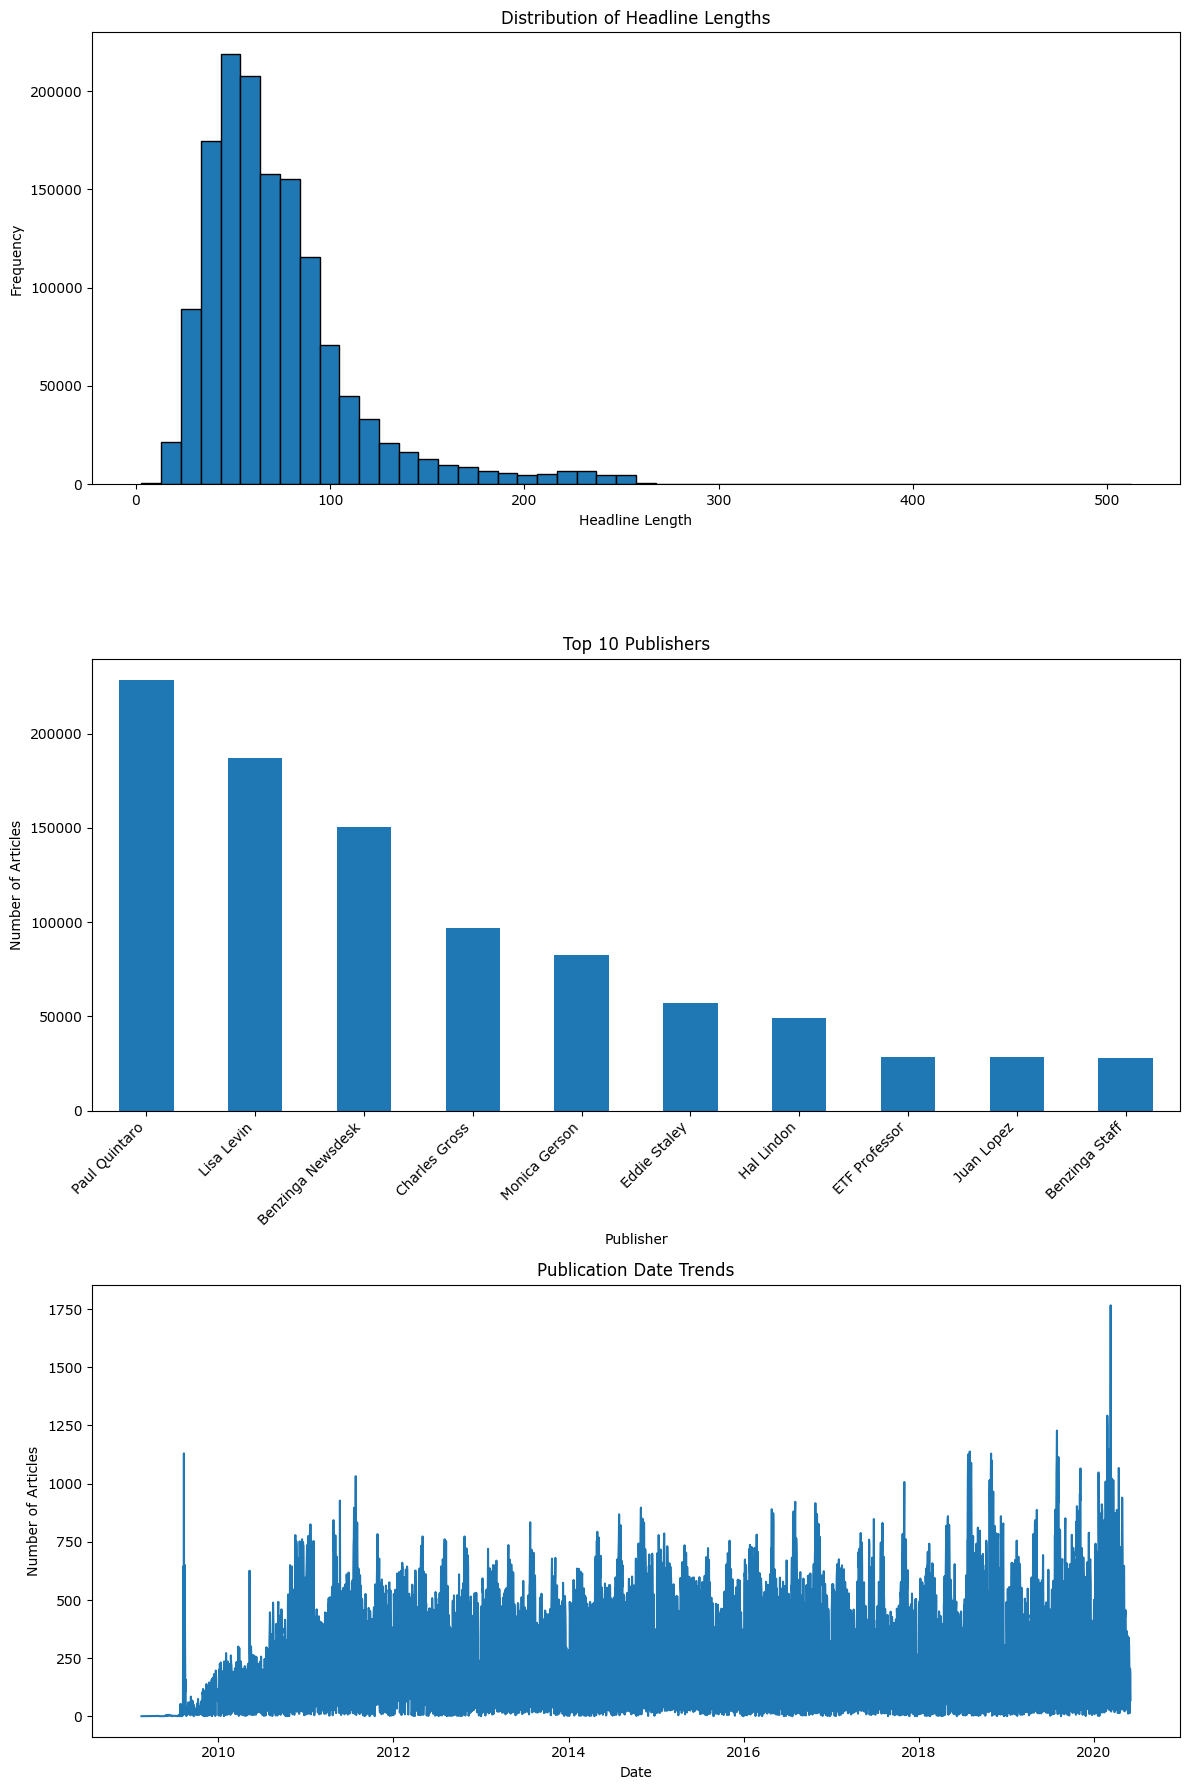

In [31]:
date_counts = data['date'].dt.date.value_counts().sort_index()

print("\nPublication Date Trends (first 10 dates):")
print(date_counts.head(10))

# Cell 6: Visualizations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Headline length distribution
ax1.hist(data['headline_length'], bins=50, edgecolor='black')
ax1.set_title('Distribution of Headline Lengths')
ax1.set_xlabel('Headline Length')
ax1.set_ylabel('Frequency')

# Top publishers
publisher_counts.head(10).plot(kind='bar', ax=ax2)
ax2.set_title('Top 10 Publishers')
ax2.set_xlabel('Publisher')
ax2.set_ylabel('Number of Articles')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Publication date trends
date_counts.plot(ax=ax3)
ax3.set_title('Publication Date Trends')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of Articles')

plt.tight_layout()
plt.show()